# TITANIC: Machine Learning from Disaster (Kaggle)

**Objective:** to create a model which predicts the survival on Titanic.

# Importing the libraries for analysis and visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [2]:
data = pd.read_csv('titanic_train.csv') #imports the data

In [3]:
data.head() #to check the head of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info() #to check the file for null values and know the size of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.describe() #to calc the mean,std,max, min and percentile

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns # to see the Variables

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

C:\Users\5559\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\5559\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


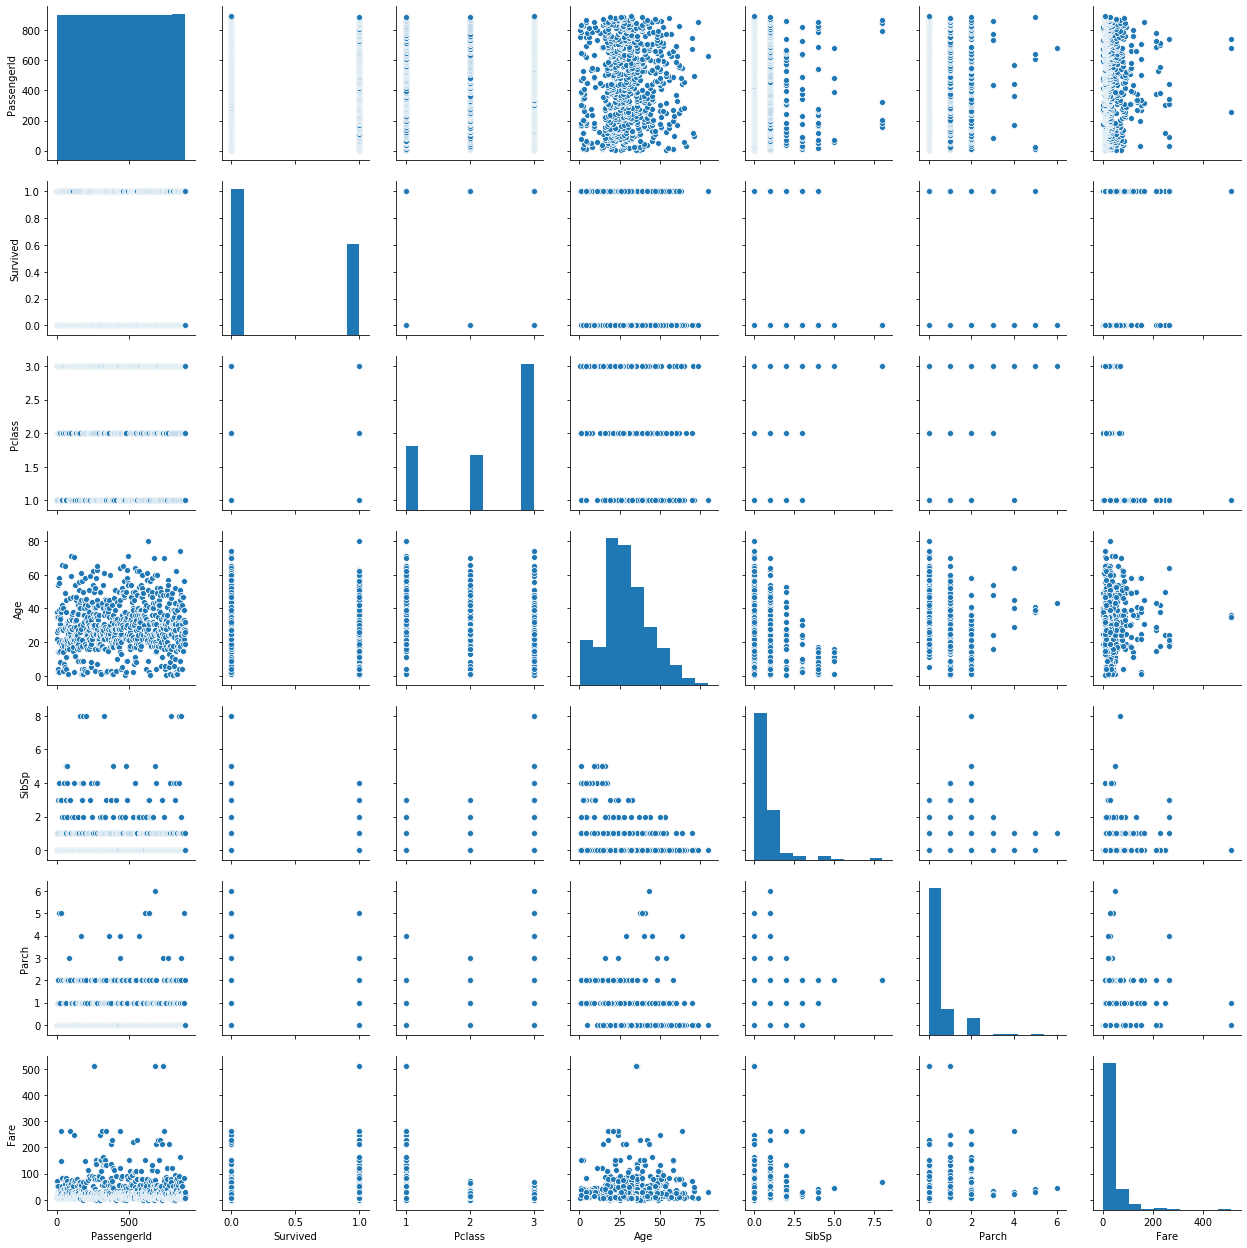

In [8]:
sns.pairplot(data) #using pairplot to check the relationship between the variables

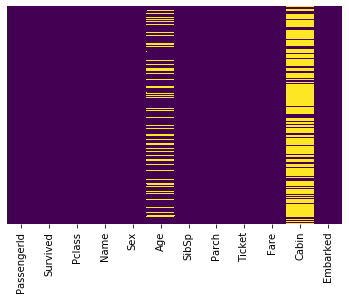

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #using heatmap to see where data is missing

**Observation:** About 20% of the Age data is missing and with negligible data of the cabin

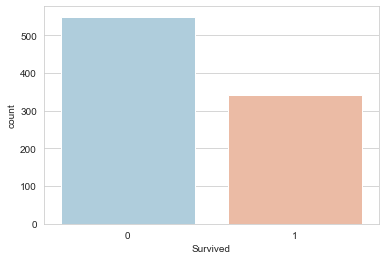

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')    #to coompare the survival ratio

**Observation:** About 60% death rate and 40% survived

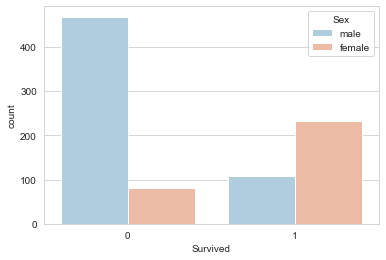

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')  #to compare the survival ratio with sex

**Observation:** About 90% death were male 

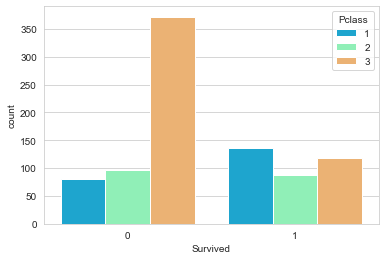

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')   #to compare the survival ratio with passenger class

**Observation:** Most death were recorded in the passenger class 3 and highest survival rate in passenger class 1

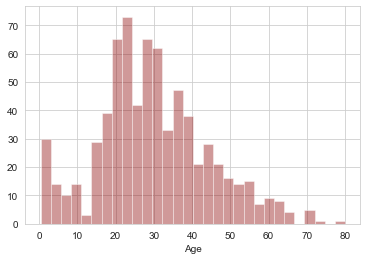

In [13]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=30)  # to check the distribution of their ages

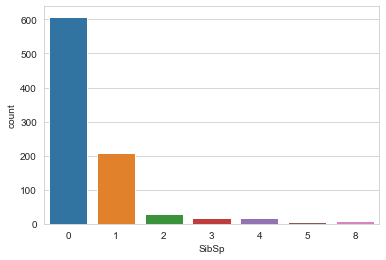

In [14]:
sns.countplot(x='SibSp',data=data)

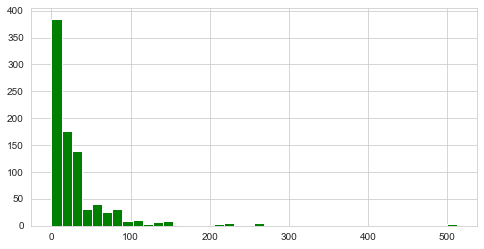

In [15]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

**Observation:** Most passenger-fare was around 20 dollars.

# Data Cleaning

computation of the mean age so as to account for the mising values

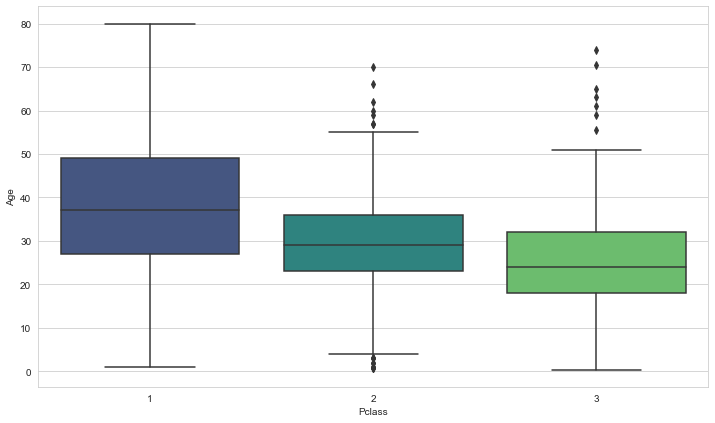

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='viridis')

**Observation:** Most paseengers in the 1st class were Older (between 28 and 49 and wealthier) with a mean age of **37**, the 2nd class were between 22 and 36 with a mean age of **29** and the 3rd class were between 18 and 32 with a mean age of **24**

In [19]:
def mean_age(cols):                              #Average age values is used to impute based on the Pclass for Age
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [21]:
data['Age'] = data[['Age', 'Pclass']].apply(mean_age,axis=1) 

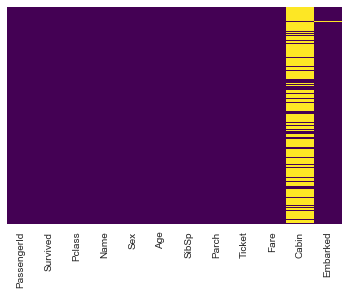

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heatmap is used to see the missing data

**Observation:** the average age has been applied.

In [23]:
data.drop('Cabin',axis=1,inplace=True)        #to drop the cabin column as there over 90% data is not available

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
data.dropna(inplace=True) #to drop the NaN row in Embarked

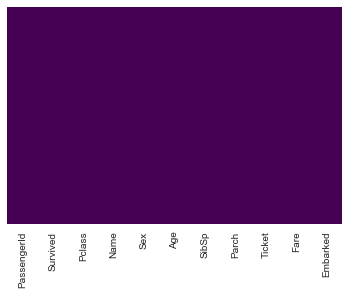

In [26]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heatmap is used to see the missing data

In [27]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
sex = pd.get_dummies(data['Sex'],drop_first=True)            #to categorical features to dummy variables
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [29]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
data = pd.concat([data,sex,embark],axis=1)

In [34]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building Logistic Regression Model

**Training and Testing the Data**

In [35]:
data.columns #to see the variables

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [36]:
y = data['Survived'] # the target variable

In [37]:
X = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male']]   
# variables to train on

In [38]:
#importing train_test_split from Sklearn.model_selection to split the data into training and testing sets 

from sklearn.model_selection import train_test_split

In [40]:
#the model is trained on training set and evaluated on the test set
#with the test size= 0.3 and random_state =100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Creating and Training the Model**

In [41]:
#importing LinearRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

In [42]:
lm = LogisticRegression() #to create an instance LogisticRegression() model

In [43]:
lm.fit(X_train,y_train)

C:\Users\5559\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# **Prediction and Evaluations**

In [44]:
predictions = lm.predict(X_test)      #to predict the perfomance of x_set of the data

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       104

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267

[[163   0]
 [  0 104]]


# Conclusion

**Objective:** to create a model which predicts the survival on Titanic.

With 100% accuracy rate, there could be an error such as overfitting of the data.